<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Loading and Exploring the Data

In [3]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [4]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [8]:
client_info = pd.read_excel(xls,'CLIENT_INFO')
loan_history = pd.read_excel(xls,'LOAN_HISTORY')
marketing_history = pd.read_excel(xls,'MARKETING HISTORY')
subscription_history = pd.read_excel(xls,'SUBSCRIPTION HISTORY')

In [9]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [11]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
df = df.drop(['ID'], axis =1)

### Task 4: Data Prep & Start H2O

In [15]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxcc5bg_m
  JVM stdout: /tmp/tmpxcc5bg_m/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmpxcc5bg_m/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,4 months and 9 days !!!
H2O_cluster_name:,H2O_from_python_rhyme_r13gn2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [16]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [18]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [20]:
train, test = h2o_df.split_frame(ratios =[.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Run H2O AutoML

In [21]:
from h2o.automl import H2OAutoML

In [24]:
aml = H2OAutoML(max_runtime_secs=600,
               balance_classes=True,
               stopping_metric='Logloss',
                project_name='Final',
               seed=1)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 2min 27s, sys: 3.51 s, total: 2min 30s
Wall time: 9min 43s


### AutoML Leaderboard and Ensemble Exploration

In [25]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20200923_165520_model_2,0.934977,0.198836,0.622165,0.153957,0.250803,0.062902
StackedEnsemble_BestOfFamily_AutoML_20200923_165520,0.93442,0.219334,0.625867,0.160476,0.256594,0.0658406
StackedEnsemble_AllModels_AutoML_20200923_165520,0.93416,0.212175,0.625442,0.167881,0.254117,0.0645756
XGBoost_grid__1_AutoML_20200923_165520_model_1,0.931469,0.204101,0.60868,0.180575,0.253661,0.0643441
XGBoost_3_AutoML_20200923_165520,0.931151,0.203914,0.61558,0.178327,0.252692,0.0638532
XGBoost_1_AutoML_20200923_165520,0.924612,0.214802,0.595621,0.187764,0.25658,0.0658332
XGBoost_2_AutoML_20200923_165520,0.924575,0.214624,0.589898,0.181366,0.256655,0.0658718
GBM_grid__1_AutoML_20200923_165520_model_1,0.923787,0.213911,0.591118,0.167725,0.258582,0.0668647
GBM_2_AutoML_20200923_165520,0.922699,0.264484,0.584739,0.179495,0.286373,0.0820098
XGBoost_grid__1_AutoML_20200923_165520_model_3,0.922509,0.218672,0.584548,0.176175,0.258238,0.0666866


In [41]:
se = aml.leader
meta = h2o.get_model(se)

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200923_165520_model_2


Model Summary: 


,,number_of_trees
0,,67.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.05097842547903392
RMSE: 0.2257840239676712
LogLoss: 0.16572233401032388
Mean Per-Class Error: 0.1057420782424785
AUC: 0.9573578820406982
AUCPR: 0.7544371733943144
Gini: 0.9147157640813963

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3075897607111161: 


,,no,yes,Error,Rate
0,no,28057.0,1858.0,0.0621,(1858.0/29915.0)
1,yes,861.0,3115.0,0.2165,(861.0/3976.0)
2,Total,28918.0,4973.0,0.0802,(2719.0/33891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.307590,0.696167,212.0
1,max f2,0.182823,0.780208,263.0
2,max f0point5,0.510868,0.710168,135.0
3,max accuracy,0.454088,0.929096,156.0
4,max precision,0.979042,1.000000,0.0
5,max recall,0.001116,1.000000,397.0
6,max specificity,0.979042,1.000000,0.0
7,max absolute_mcc,0.307590,0.656017,212.0
8,max min_per_class_accuracy,0.176736,0.890189,266.0
9,max mean_per_class_accuracy,0.130995,0.894258,288.0



Gains/Lift Table: Avg response rate: 11.73 %, avg score: 11.74 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.887788,8.222163,8.222163,0.964602,0.925417,0.964602,0.925417,0.082243,0.082243,722.216262,722.216262
1,,2,0.020005,0.820581,7.442692,7.832427,0.873156,0.855074,0.918879,0.890246,0.074447,0.156690,644.269155,683.242708
2,,3,0.030008,0.756710,7.115817,7.593557,0.834808,0.786299,0.890855,0.855597,0.071177,0.227867,611.581658,659.355692
3,,4,0.040011,0.701539,6.914663,7.423833,0.811209,0.728127,0.870944,0.823729,0.069165,0.297032,591.466276,642.383338
4,,5,0.050013,0.652984,6.411778,7.221422,0.752212,0.677445,0.847198,0.794472,0.064135,0.361167,541.177819,622.142234
5,,6,0.100027,0.453896,5.235028,6.228225,0.614159,0.547681,0.730678,0.671077,0.261821,0.622988,423.502831,522.822533
6,,7,0.150010,0.297274,3.341125,5.266237,0.391972,0.372169,0.617821,0.571480,0.167002,0.789990,234.112467,426.623703
7,,8,0.200024,0.178727,2.001481,4.449928,0.234808,0.234562,0.522053,0.487238,0.100101,0.890091,100.148056,344.992751
8,,9,0.300021,0.064472,0.822459,3.240890,0.096489,0.110480,0.380212,0.361664,0.082243,0.972334,-17.754112,224.089022
9,,10,0.400018,0.029665,0.198698,2.480398,0.023311,0.044159,0.290994,0.282294,0.019869,0.992203,-80.130198,148.039827




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.06290201909467003
RMSE: 0.250802749376218
LogLoss: 0.19883575586500568
Mean Per-Class Error: 0.12572418044957023
AUC: 0.9349765062041984
AUCPR: 0.6221650336970174
Gini: 0.8699530124083967

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22964016957716507: 


,,no,yes,Error,Rate
0,no,27084.0,2831.0,0.0946,(2831.0/29915.0)
1,yes,848.0,3128.0,0.2133,(848.0/3976.0)
2,Total,27932.0,5959.0,0.1086,(3679.0/33891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.229640,0.629693,240.0
1,max f2,0.113112,0.743520,298.0
2,max f0point5,0.482893,0.601161,143.0
3,max accuracy,0.482893,0.907409,143.0
4,max precision,0.984683,1.000000,0.0
5,max recall,0.000529,1.000000,398.0
6,max specificity,0.984683,1.000000,0.0
7,max absolute_mcc,0.229640,0.585046,240.0
8,max min_per_class_accuracy,0.146688,0.866254,280.0
9,max mean_per_class_accuracy,0.107487,0.874276,301.0



Gains/Lift Table: Avg response rate: 11.73 %, avg score: 11.64 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.887628,6.889519,6.889519,0.808260,0.926663,0.808260,0.926663,0.068913,0.068913,588.951853,588.951853
1,,2,0.020005,0.815215,6.487211,6.688365,0.761062,0.850016,0.784661,0.888340,0.064889,0.133803,548.721088,568.836470
2,,3,0.030008,0.753644,5.833461,6.403397,0.684366,0.782989,0.751229,0.853223,0.058350,0.192153,483.346094,540.339678
3,,4,0.040011,0.696994,5.607163,6.204338,0.657817,0.724379,0.727876,0.821012,0.056087,0.248239,460.716289,520.433831
4,,5,0.050013,0.644728,5.380865,6.039644,0.631268,0.669694,0.708555,0.790748,0.053823,0.302062,438.086484,503.964361
5,,6,0.100027,0.450348,4.551105,5.295374,0.533923,0.541792,0.621239,0.666270,0.227616,0.529678,355.110530,429.537446
6,,7,0.150010,0.293346,3.622906,4.738104,0.425030,0.367571,0.555862,0.566743,0.181087,0.710765,262.290627,373.810437
7,,8,0.200024,0.178853,2.494307,4.177072,0.292625,0.231816,0.490043,0.482999,0.124748,0.835513,149.430744,317.707239
8,,9,0.300021,0.064861,1.109188,3.154545,0.130127,0.111165,0.370083,0.359066,0.110915,0.946429,10.918766,215.454472
9,,10,0.400018,0.029222,0.337032,2.450219,0.039540,0.043854,0.287453,0.280269,0.033702,0.980131,-66.296792,145.021852




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.89622587,0.006667067,0.9048532,0.88846266,0.8906757,0.8993803,0.8977575
1,auc,0.93505454,0.006499316,0.94245267,0.9282024,0.92818624,0.938461,0.9379704
2,aucpr,0.62384063,0.026855184,0.64147997,0.580811,0.61455345,0.63702005,0.64533854
3,err,0.103774115,0.006667067,0.095146775,0.11153733,0.109324284,0.10061965,0.10224255
4,err_count,703.4,45.158607,645.0,756.0,741.0,682.0,693.0
5,f0point5,0.574725,0.015858576,0.5917684,0.552222,0.5660724,0.5859448,0.57761735
6,f1,0.6341671,0.017631596,0.650785,0.6091003,0.6244298,0.6495375,0.63698274
7,f2,0.70733666,0.020159902,0.7228771,0.6790408,0.6962025,0.7286143,0.7099486
8,lift_top_group,6.920662,0.3481345,6.8618603,6.470882,6.8321695,7.0036163,7.434781
9,logloss,0.19883615,0.010778814,0.18553813,0.20982903,0.21008092,0.19493501,0.19379765



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-23 17:00:52,1 min 42.904 sec,0.0,0.500000,0.693147,0.500000,0.117317,1.000000,0.882683
1,,2020-09-23 17:00:54,1 min 44.579 sec,5.0,0.276151,0.284603,0.911086,0.604518,7.543268,0.104128
2,,2020-09-23 17:00:54,1 min 45.042 sec,10.0,0.255614,0.226529,0.927144,0.635068,7.417547,0.104098
3,,2020-09-23 17:00:55,1 min 45.984 sec,15.0,0.248961,0.206936,0.934839,0.656149,7.568413,0.101472
4,,2020-09-23 17:00:56,1 min 47.140 sec,20.0,0.245555,0.197826,0.938247,0.667139,7.694134,0.096102
5,,2020-09-23 17:00:57,1 min 48.167 sec,25.0,0.242409,0.191535,0.942663,0.681259,7.895288,0.095158
6,,2020-09-23 17:00:58,1 min 49.177 sec,30.0,0.239046,0.185505,0.945921,0.694701,7.895288,0.092060
7,,2020-09-23 17:01:00,1 min 50.397 sec,35.0,0.236688,0.181673,0.948226,0.706025,7.995865,0.088637
8,,2020-09-23 17:01:01,1 min 51.413 sec,40.0,0.234505,0.178147,0.950136,0.715322,7.945576,0.087309
9,,2020-09-23 17:01:02,1 min 52.449 sec,45.0,0.232846,0.175634,0.951605,0.722704,7.970720,0.083651



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DURATION,9998.696289,1.000000,0.426106
1,POUTCOME.success,1484.093994,0.148429,0.063246
2,HOUSING.no,1077.804199,0.107794,0.045932
3,AGE,1027.862427,0.102800,0.043804
4,DAY,1025.213257,0.102535,0.043691
5,CONTACT.unknown,973.039612,0.097317,0.041467
6,PDAYS,904.957275,0.090508,0.038566
7,BALANCE,644.918457,0.064500,0.027484
8,MONTH.mar,498.353577,0.049842,0.021238
9,HOUSING.yes,457.678711,0.045774,0.019504



See the whole table with table.as_data_frame()
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200923_165520_model_2


Model Summary: 


,,number_of_trees
0,,67.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.05097842547903392
RMSE: 0.2257840239676712
LogLoss: 0.16572233401032388
Mean Per-Class Error: 0.1057420782424785
AUC: 0.9573578820406982
AUCPR: 0.7544371733943144
Gini: 0.9147157640813963

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3075897607111161: 


,,no,yes,Error,Rate
0,no,28057.0,1858.0,0.0621,(1858.0/29915.0)
1,yes,861.0,3115.0,0.2165,(861.0/3976.0)
2,Total,28918.0,4973.0,0.0802,(2719.0/33891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.307590,0.696167,212.0
1,max f2,0.182823,0.780208,263.0
2,max f0point5,0.510868,0.710168,135.0
3,max accuracy,0.454088,0.929096,156.0
4,max precision,0.979042,1.000000,0.0
5,max recall,0.001116,1.000000,397.0
6,max specificity,0.979042,1.000000,0.0
7,max absolute_mcc,0.307590,0.656017,212.0
8,max min_per_class_accuracy,0.176736,0.890189,266.0
9,max mean_per_class_accuracy,0.130995,0.894258,288.0



Gains/Lift Table: Avg response rate: 11.73 %, avg score: 11.74 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.887788,8.222163,8.222163,0.964602,0.925417,0.964602,0.925417,0.082243,0.082243,722.216262,722.216262
1,,2,0.020005,0.820581,7.442692,7.832427,0.873156,0.855074,0.918879,0.890246,0.074447,0.156690,644.269155,683.242708
2,,3,0.030008,0.756710,7.115817,7.593557,0.834808,0.786299,0.890855,0.855597,0.071177,0.227867,611.581658,659.355692
3,,4,0.040011,0.701539,6.914663,7.423833,0.811209,0.728127,0.870944,0.823729,0.069165,0.297032,591.466276,642.383338
4,,5,0.050013,0.652984,6.411778,7.221422,0.752212,0.677445,0.847198,0.794472,0.064135,0.361167,541.177819,622.142234
5,,6,0.100027,0.453896,5.235028,6.228225,0.614159,0.547681,0.730678,0.671077,0.261821,0.622988,423.502831,522.822533
6,,7,0.150010,0.297274,3.341125,5.266237,0.391972,0.372169,0.617821,0.571480,0.167002,0.789990,234.112467,426.623703
7,,8,0.200024,0.178727,2.001481,4.449928,0.234808,0.234562,0.522053,0.487238,0.100101,0.890091,100.148056,344.992751
8,,9,0.300021,0.064472,0.822459,3.240890,0.096489,0.110480,0.380212,0.361664,0.082243,0.972334,-17.754112,224.089022
9,,10,0.400018,0.029665,0.198698,2.480398,0.023311,0.044159,0.290994,0.282294,0.019869,0.992203,-80.130198,148.039827




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.06290201909467003
RMSE: 0.250802749376218
LogLoss: 0.19883575586500568
Mean Per-Class Error: 0.12572418044957023
AUC: 0.9349765062041984
AUCPR: 0.6221650336970174
Gini: 0.8699530124083967

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22964016957716507: 


,,no,yes,Error,Rate
0,no,27084.0,2831.0,0.0946,(2831.0/29915.0)
1,yes,848.0,3128.0,0.2133,(848.0/3976.0)
2,Total,27932.0,5959.0,0.1086,(3679.0/33891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.229640,0.629693,240.0
1,max f2,0.113112,0.743520,298.0
2,max f0point5,0.482893,0.601161,143.0
3,max accuracy,0.482893,0.907409,143.0
4,max precision,0.984683,1.000000,0.0
5,max recall,0.000529,1.000000,398.0
6,max specificity,0.984683,1.000000,0.0
7,max absolute_mcc,0.229640,0.585046,240.0
8,max min_per_class_accuracy,0.146688,0.866254,280.0
9,max mean_per_class_accuracy,0.107487,0.874276,301.0



Gains/Lift Table: Avg response rate: 11.73 %, avg score: 11.64 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.887628,6.889519,6.889519,0.808260,0.926663,0.808260,0.926663,0.068913,0.068913,588.951853,588.951853
1,,2,0.020005,0.815215,6.487211,6.688365,0.761062,0.850016,0.784661,0.888340,0.064889,0.133803,548.721088,568.836470
2,,3,0.030008,0.753644,5.833461,6.403397,0.684366,0.782989,0.751229,0.853223,0.058350,0.192153,483.346094,540.339678
3,,4,0.040011,0.696994,5.607163,6.204338,0.657817,0.724379,0.727876,0.821012,0.056087,0.248239,460.716289,520.433831
4,,5,0.050013,0.644728,5.380865,6.039644,0.631268,0.669694,0.708555,0.790748,0.053823,0.302062,438.086484,503.964361
5,,6,0.100027,0.450348,4.551105,5.295374,0.533923,0.541792,0.621239,0.666270,0.227616,0.529678,355.110530,429.537446
6,,7,0.150010,0.293346,3.622906,4.738104,0.425030,0.367571,0.555862,0.566743,0.181087,0.710765,262.290627,373.810437
7,,8,0.200024,0.178853,2.494307,4.177072,0.292625,0.231816,0.490043,0.482999,0.124748,0.835513,149.430744,317.707239
8,,9,0.300021,0.064861,1.109188,3.154545,0.130127,0.111165,0.370083,0.359066,0.110915,0.946429,10.918766,215.454472
9,,10,0.400018,0.029222,0.337032,2.450219,0.039540,0.043854,0.287453,0.280269,0.033702,0.980131,-66.296792,145.021852




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.89622587,0.006667067,0.9048532,0.88846266,0.8906757,0.8993803,0.8977575
1,auc,0.93505454,0.006499316,0.94245267,0.9282024,0.92818624,0.938461,0.9379704
2,aucpr,0.62384063,0.026855184,0.64147997,0.580811,0.61455345,0.63702005,0.64533854
3,err,0.103774115,0.006667067,0.095146775,0.11153733,0.109324284,0.10061965,0.10224255
4,err_count,703.4,45.158607,645.0,756.0,741.0,682.0,693.0
5,f0point5,0.574725,0.015858576,0.5917684,0.552222,0.5660724,0.5859448,0.57761735
6,f1,0.6341671,0.017631596,0.650785,0.6091003,0.6244298,0.6495375,0.63698274
7,f2,0.70733666,0.020159902,0.7228771,0.6790408,0.6962025,0.7286143,0.7099486
8,lift_top_group,6.920662,0.3481345,6.8618603,6.470882,6.8321695,7.0036163,7.434781
9,logloss,0.19883615,0.010778814,0.18553813,0.20982903,0.21008092,0.19493501,0.19379765



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-23 17:00:52,1 min 42.904 sec,0.0,0.500000,0.693147,0.500000,0.117317,1.000000,0.882683
1,,2020-09-23 17:00:54,1 min 44.579 sec,5.0,0.276151,0.284603,0.911086,0.604518,7.543268,0.104128
2,,2020-09-23 17:00:54,1 min 45.042 sec,10.0,0.255614,0.226529,0.927144,0.635068,7.417547,0.104098
3,,2020-09-23 17:00:55,1 min 45.984 sec,15.0,0.248961,0.206936,0.934839,0.656149,7.568413,0.101472
4,,2020-09-23 17:00:56,1 min 47.140 sec,20.0,0.245555,0.197826,0.938247,0.667139,7.694134,0.096102
5,,2020-09-23 17:00:57,1 min 48.167 sec,25.0,0.242409,0.191535,0.942663,0.681259,7.895288,0.095158
6,,2020-09-23 17:00:58,1 min 49.177 sec,30.0,0.239046,0.185505,0.945921,0.694701,7.895288,0.092060
7,,2020-09-23 17:01:00,1 min 50.397 sec,35.0,0.236688,0.181673,0.948226,0.706025,7.995865,0.088637
8,,2020-09-23 17:01:01,1 min 51.413 sec,40.0,0.234505,0.178147,0.950136,0.715322,7.945576,0.087309
9,,2020-09-23 17:01:02,1 min 52.449 sec,45.0,0.232846,0.175634,0.951605,0.722704,7.970720,0.083651



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DURATION,9998.696289,1.000000,0.426106
1,POUTCOME.success,1484.093994,0.148429,0.063246
2,HOUSING.no,1077.804199,0.107794,0.045932
3,AGE,1027.862427,0.102800,0.043804
4,DAY,1025.213257,0.102535,0.043691
5,CONTACT.unknown,973.039612,0.097317,0.041467
6,PDAYS,904.957275,0.090508,0.038566
7,BALANCE,644.918457,0.064500,0.027484
8,MONTH.mar,498.353577,0.049842,0.021238
9,HOUSING.yes,457.678711,0.045774,0.019504



See the whole table with table.as_data_frame()


H2OTypeError: Argument `model_id` should be a string, got H2OXGBoostEstimator 

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200923_165520_model_2


Model Summary: 


,,number_of_trees
0,,67.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.05097842547903392
RMSE: 0.2257840239676712
LogLoss: 0.16572233401032388
Mean Per-Class Error: 0.1057420782424785
AUC: 0.9573578820406982
AUCPR: 0.7544371733943144
Gini: 0.9147157640813963

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3075897607111161: 


,,no,yes,Error,Rate
0,no,28057.0,1858.0,0.0621,(1858.0/29915.0)
1,yes,861.0,3115.0,0.2165,(861.0/3976.0)
2,Total,28918.0,4973.0,0.0802,(2719.0/33891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.307590,0.696167,212.0
1,max f2,0.182823,0.780208,263.0
2,max f0point5,0.510868,0.710168,135.0
3,max accuracy,0.454088,0.929096,156.0
4,max precision,0.979042,1.000000,0.0
5,max recall,0.001116,1.000000,397.0
6,max specificity,0.979042,1.000000,0.0
7,max absolute_mcc,0.307590,0.656017,212.0
8,max min_per_class_accuracy,0.176736,0.890189,266.0
9,max mean_per_class_accuracy,0.130995,0.894258,288.0



Gains/Lift Table: Avg response rate: 11.73 %, avg score: 11.74 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.887788,8.222163,8.222163,0.964602,0.925417,0.964602,0.925417,0.082243,0.082243,722.216262,722.216262
1,,2,0.020005,0.820581,7.442692,7.832427,0.873156,0.855074,0.918879,0.890246,0.074447,0.156690,644.269155,683.242708
2,,3,0.030008,0.756710,7.115817,7.593557,0.834808,0.786299,0.890855,0.855597,0.071177,0.227867,611.581658,659.355692
3,,4,0.040011,0.701539,6.914663,7.423833,0.811209,0.728127,0.870944,0.823729,0.069165,0.297032,591.466276,642.383338
4,,5,0.050013,0.652984,6.411778,7.221422,0.752212,0.677445,0.847198,0.794472,0.064135,0.361167,541.177819,622.142234
5,,6,0.100027,0.453896,5.235028,6.228225,0.614159,0.547681,0.730678,0.671077,0.261821,0.622988,423.502831,522.822533
6,,7,0.150010,0.297274,3.341125,5.266237,0.391972,0.372169,0.617821,0.571480,0.167002,0.789990,234.112467,426.623703
7,,8,0.200024,0.178727,2.001481,4.449928,0.234808,0.234562,0.522053,0.487238,0.100101,0.890091,100.148056,344.992751
8,,9,0.300021,0.064472,0.822459,3.240890,0.096489,0.110480,0.380212,0.361664,0.082243,0.972334,-17.754112,224.089022
9,,10,0.400018,0.029665,0.198698,2.480398,0.023311,0.044159,0.290994,0.282294,0.019869,0.992203,-80.130198,148.039827




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.06290201909467003
RMSE: 0.250802749376218
LogLoss: 0.19883575586500568
Mean Per-Class Error: 0.12572418044957023
AUC: 0.9349765062041984
AUCPR: 0.6221650336970174
Gini: 0.8699530124083967

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22964016957716507: 


,,no,yes,Error,Rate
0,no,27084.0,2831.0,0.0946,(2831.0/29915.0)
1,yes,848.0,3128.0,0.2133,(848.0/3976.0)
2,Total,27932.0,5959.0,0.1086,(3679.0/33891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.229640,0.629693,240.0
1,max f2,0.113112,0.743520,298.0
2,max f0point5,0.482893,0.601161,143.0
3,max accuracy,0.482893,0.907409,143.0
4,max precision,0.984683,1.000000,0.0
5,max recall,0.000529,1.000000,398.0
6,max specificity,0.984683,1.000000,0.0
7,max absolute_mcc,0.229640,0.585046,240.0
8,max min_per_class_accuracy,0.146688,0.866254,280.0
9,max mean_per_class_accuracy,0.107487,0.874276,301.0



Gains/Lift Table: Avg response rate: 11.73 %, avg score: 11.64 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.887628,6.889519,6.889519,0.808260,0.926663,0.808260,0.926663,0.068913,0.068913,588.951853,588.951853
1,,2,0.020005,0.815215,6.487211,6.688365,0.761062,0.850016,0.784661,0.888340,0.064889,0.133803,548.721088,568.836470
2,,3,0.030008,0.753644,5.833461,6.403397,0.684366,0.782989,0.751229,0.853223,0.058350,0.192153,483.346094,540.339678
3,,4,0.040011,0.696994,5.607163,6.204338,0.657817,0.724379,0.727876,0.821012,0.056087,0.248239,460.716289,520.433831
4,,5,0.050013,0.644728,5.380865,6.039644,0.631268,0.669694,0.708555,0.790748,0.053823,0.302062,438.086484,503.964361
5,,6,0.100027,0.450348,4.551105,5.295374,0.533923,0.541792,0.621239,0.666270,0.227616,0.529678,355.110530,429.537446
6,,7,0.150010,0.293346,3.622906,4.738104,0.425030,0.367571,0.555862,0.566743,0.181087,0.710765,262.290627,373.810437
7,,8,0.200024,0.178853,2.494307,4.177072,0.292625,0.231816,0.490043,0.482999,0.124748,0.835513,149.430744,317.707239
8,,9,0.300021,0.064861,1.109188,3.154545,0.130127,0.111165,0.370083,0.359066,0.110915,0.946429,10.918766,215.454472
9,,10,0.400018,0.029222,0.337032,2.450219,0.039540,0.043854,0.287453,0.280269,0.033702,0.980131,-66.296792,145.021852




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.89622587,0.006667067,0.9048532,0.88846266,0.8906757,0.8993803,0.8977575
1,auc,0.93505454,0.006499316,0.94245267,0.9282024,0.92818624,0.938461,0.9379704
2,aucpr,0.62384063,0.026855184,0.64147997,0.580811,0.61455345,0.63702005,0.64533854
3,err,0.103774115,0.006667067,0.095146775,0.11153733,0.109324284,0.10061965,0.10224255
4,err_count,703.4,45.158607,645.0,756.0,741.0,682.0,693.0
5,f0point5,0.574725,0.015858576,0.5917684,0.552222,0.5660724,0.5859448,0.57761735
6,f1,0.6341671,0.017631596,0.650785,0.6091003,0.6244298,0.6495375,0.63698274
7,f2,0.70733666,0.020159902,0.7228771,0.6790408,0.6962025,0.7286143,0.7099486
8,lift_top_group,6.920662,0.3481345,6.8618603,6.470882,6.8321695,7.0036163,7.434781
9,logloss,0.19883615,0.010778814,0.18553813,0.20982903,0.21008092,0.19493501,0.19379765



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-23 17:00:52,1 min 42.904 sec,0.0,0.500000,0.693147,0.500000,0.117317,1.000000,0.882683
1,,2020-09-23 17:00:54,1 min 44.579 sec,5.0,0.276151,0.284603,0.911086,0.604518,7.543268,0.104128
2,,2020-09-23 17:00:54,1 min 45.042 sec,10.0,0.255614,0.226529,0.927144,0.635068,7.417547,0.104098
3,,2020-09-23 17:00:55,1 min 45.984 sec,15.0,0.248961,0.206936,0.934839,0.656149,7.568413,0.101472
4,,2020-09-23 17:00:56,1 min 47.140 sec,20.0,0.245555,0.197826,0.938247,0.667139,7.694134,0.096102
5,,2020-09-23 17:00:57,1 min 48.167 sec,25.0,0.242409,0.191535,0.942663,0.681259,7.895288,0.095158
6,,2020-09-23 17:00:58,1 min 49.177 sec,30.0,0.239046,0.185505,0.945921,0.694701,7.895288,0.092060
7,,2020-09-23 17:01:00,1 min 50.397 sec,35.0,0.236688,0.181673,0.948226,0.706025,7.995865,0.088637
8,,2020-09-23 17:01:01,1 min 51.413 sec,40.0,0.234505,0.178147,0.950136,0.715322,7.945576,0.087309
9,,2020-09-23 17:01:02,1 min 52.449 sec,45.0,0.232846,0.175634,0.951605,0.722704,7.970720,0.083651



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DURATION,9998.696289,1.000000,0.426106
1,POUTCOME.success,1484.093994,0.148429,0.063246
2,HOUSING.no,1077.804199,0.107794,0.045932
3,AGE,1027.862427,0.102800,0.043804
4,DAY,1025.213257,0.102535,0.043691
5,CONTACT.unknown,973.039612,0.097317,0.041467
6,PDAYS,904.957275,0.090508,0.038566
7,BALANCE,644.918457,0.064500,0.027484
8,MONTH.mar,498.353577,0.049842,0.021238
9,HOUSING.yes,457.678711,0.045774,0.019504



See the whole table with table.as_data_frame()


In [42]:
meta.variimp()

NameError: name 'meta' is not defined

### Task 7: Base Learner XGBoost Model Exploration

In [43]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20200923_165520_model_2')


In [45]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06093622633670251
RMSE: 0.24685264093523995
LogLoss: 0.1968858045751739
Mean Per-Class Error: 0.1305157600646798
AUC: 0.9337673072870317
AUCPR: 0.631714517380702
Gini: 0.8675346145740634

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29991502846990314: 


,,no,yes,Error,Rate
0,no,9237.0,770.0,0.0769,(770.0/10007.0)
1,yes,331.0,982.0,0.2521,(331.0/1313.0)
2,Total,9568.0,1752.0,0.0973,(1101.0/11320.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.299915,0.640783,211.0
1,max f2,0.118576,0.735368,291.0
2,max f0point5,0.506863,0.622072,135.0
3,max accuracy,0.506863,0.912456,135.0
4,max precision,0.977401,1.000000,0.0
5,max recall,0.001119,1.000000,396.0
6,max specificity,0.977401,1.000000,0.0
7,max absolute_mcc,0.254499,0.594612,229.0
8,max min_per_class_accuracy,0.147587,0.861297,277.0
9,max mean_per_class_accuracy,0.118576,0.869484,291.0



Gains/Lift Table: Avg response rate: 11.60 %, avg score: 11.99 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010071,0.890396,6.882057,6.882057,0.798246,0.929004,0.798246,0.929004,0.069307,0.069307,588.205663,588.205663
1,,2,0.020053,0.819347,6.714071,6.798434,0.778761,0.853118,0.788546,0.891228,0.067022,0.136329,571.407100,579.843383
2,,3,0.030035,0.751386,6.485182,6.694324,0.752212,0.782003,0.776471,0.854927,0.064737,0.201066,548.518221,569.432373
3,,4,0.040018,0.700750,5.417035,6.375706,0.628319,0.724387,0.739514,0.822364,0.054075,0.255141,441.703456,537.570634
4,,5,0.050000,0.657117,5.417035,6.184311,0.628319,0.678231,0.717314,0.793588,0.054075,0.309216,441.703456,518.431074
5,,6,0.100000,0.464602,4.706778,5.445545,0.545936,0.559014,0.631625,0.676301,0.235339,0.544554,370.677837,444.554455
6,,7,0.150000,0.311930,3.701447,4.864179,0.429329,0.384983,0.564193,0.579195,0.185072,0.729627,270.144707,386.417873
7,,8,0.200000,0.188459,2.132521,4.181264,0.247350,0.245315,0.484982,0.495725,0.106626,0.836253,113.252094,318.126428
8,,9,0.300000,0.067620,1.051028,3.137852,0.121908,0.114823,0.363958,0.368758,0.105103,0.941356,5.102818,213.785225
9,,10,0.400000,0.031397,0.274181,2.421935,0.031802,0.046389,0.280919,0.288166,0.027418,0.968774,-72.581874,142.193450


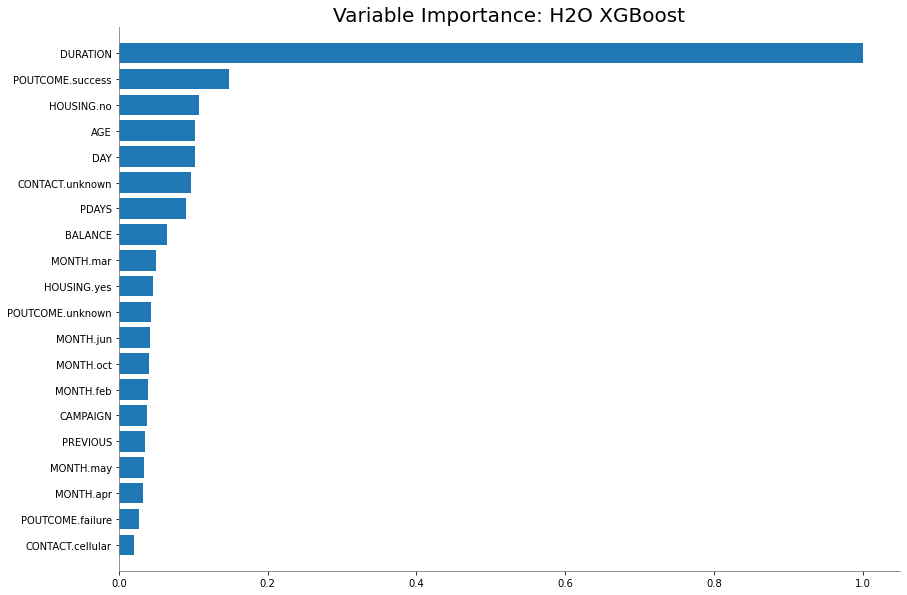

In [48]:
model.varimp_plot(num_of_features=20)

In [47]:
model.varimp_plot?

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200923_165520_model_2


Model Summary: 


,,number_of_trees
0,,67.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.05097842547903392
RMSE: 0.2257840239676712
LogLoss: 0.16572233401032388
Mean Per-Class Error: 0.1057420782424785
AUC: 0.9573578820406982
AUCPR: 0.7544371733943144
Gini: 0.9147157640813963

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3075897607111161: 


,,no,yes,Error,Rate
0,no,28057.0,1858.0,0.0621,(1858.0/29915.0)
1,yes,861.0,3115.0,0.2165,(861.0/3976.0)
2,Total,28918.0,4973.0,0.0802,(2719.0/33891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.307590,0.696167,212.0
1,max f2,0.182823,0.780208,263.0
2,max f0point5,0.510868,0.710168,135.0
3,max accuracy,0.454088,0.929096,156.0
4,max precision,0.979042,1.000000,0.0
5,max recall,0.001116,1.000000,397.0
6,max specificity,0.979042,1.000000,0.0
7,max absolute_mcc,0.307590,0.656017,212.0
8,max min_per_class_accuracy,0.176736,0.890189,266.0
9,max mean_per_class_accuracy,0.130995,0.894258,288.0



Gains/Lift Table: Avg response rate: 11.73 %, avg score: 11.74 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.887788,8.222163,8.222163,0.964602,0.925417,0.964602,0.925417,0.082243,0.082243,722.216262,722.216262
1,,2,0.020005,0.820581,7.442692,7.832427,0.873156,0.855074,0.918879,0.890246,0.074447,0.156690,644.269155,683.242708
2,,3,0.030008,0.756710,7.115817,7.593557,0.834808,0.786299,0.890855,0.855597,0.071177,0.227867,611.581658,659.355692
3,,4,0.040011,0.701539,6.914663,7.423833,0.811209,0.728127,0.870944,0.823729,0.069165,0.297032,591.466276,642.383338
4,,5,0.050013,0.652984,6.411778,7.221422,0.752212,0.677445,0.847198,0.794472,0.064135,0.361167,541.177819,622.142234
5,,6,0.100027,0.453896,5.235028,6.228225,0.614159,0.547681,0.730678,0.671077,0.261821,0.622988,423.502831,522.822533
6,,7,0.150010,0.297274,3.341125,5.266237,0.391972,0.372169,0.617821,0.571480,0.167002,0.789990,234.112467,426.623703
7,,8,0.200024,0.178727,2.001481,4.449928,0.234808,0.234562,0.522053,0.487238,0.100101,0.890091,100.148056,344.992751
8,,9,0.300021,0.064472,0.822459,3.240890,0.096489,0.110480,0.380212,0.361664,0.082243,0.972334,-17.754112,224.089022
9,,10,0.400018,0.029665,0.198698,2.480398,0.023311,0.044159,0.290994,0.282294,0.019869,0.992203,-80.130198,148.039827




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.06290201909467003
RMSE: 0.250802749376218
LogLoss: 0.19883575586500568
Mean Per-Class Error: 0.12572418044957023
AUC: 0.9349765062041984
AUCPR: 0.6221650336970174
Gini: 0.8699530124083967

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22964016957716507: 


,,no,yes,Error,Rate
0,no,27084.0,2831.0,0.0946,(2831.0/29915.0)
1,yes,848.0,3128.0,0.2133,(848.0/3976.0)
2,Total,27932.0,5959.0,0.1086,(3679.0/33891.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.229640,0.629693,240.0
1,max f2,0.113112,0.743520,298.0
2,max f0point5,0.482893,0.601161,143.0
3,max accuracy,0.482893,0.907409,143.0
4,max precision,0.984683,1.000000,0.0
5,max recall,0.000529,1.000000,398.0
6,max specificity,0.984683,1.000000,0.0
7,max absolute_mcc,0.229640,0.585046,240.0
8,max min_per_class_accuracy,0.146688,0.866254,280.0
9,max mean_per_class_accuracy,0.107487,0.874276,301.0



Gains/Lift Table: Avg response rate: 11.73 %, avg score: 11.64 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010003,0.887628,6.889519,6.889519,0.808260,0.926663,0.808260,0.926663,0.068913,0.068913,588.951853,588.951853
1,,2,0.020005,0.815215,6.487211,6.688365,0.761062,0.850016,0.784661,0.888340,0.064889,0.133803,548.721088,568.836470
2,,3,0.030008,0.753644,5.833461,6.403397,0.684366,0.782989,0.751229,0.853223,0.058350,0.192153,483.346094,540.339678
3,,4,0.040011,0.696994,5.607163,6.204338,0.657817,0.724379,0.727876,0.821012,0.056087,0.248239,460.716289,520.433831
4,,5,0.050013,0.644728,5.380865,6.039644,0.631268,0.669694,0.708555,0.790748,0.053823,0.302062,438.086484,503.964361
5,,6,0.100027,0.450348,4.551105,5.295374,0.533923,0.541792,0.621239,0.666270,0.227616,0.529678,355.110530,429.537446
6,,7,0.150010,0.293346,3.622906,4.738104,0.425030,0.367571,0.555862,0.566743,0.181087,0.710765,262.290627,373.810437
7,,8,0.200024,0.178853,2.494307,4.177072,0.292625,0.231816,0.490043,0.482999,0.124748,0.835513,149.430744,317.707239
8,,9,0.300021,0.064861,1.109188,3.154545,0.130127,0.111165,0.370083,0.359066,0.110915,0.946429,10.918766,215.454472
9,,10,0.400018,0.029222,0.337032,2.450219,0.039540,0.043854,0.287453,0.280269,0.033702,0.980131,-66.296792,145.021852




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.89622587,0.006667067,0.9048532,0.88846266,0.8906757,0.8993803,0.8977575
1,auc,0.93505454,0.006499316,0.94245267,0.9282024,0.92818624,0.938461,0.9379704
2,aucpr,0.62384063,0.026855184,0.64147997,0.580811,0.61455345,0.63702005,0.64533854
3,err,0.103774115,0.006667067,0.095146775,0.11153733,0.109324284,0.10061965,0.10224255
4,err_count,703.4,45.158607,645.0,756.0,741.0,682.0,693.0
5,f0point5,0.574725,0.015858576,0.5917684,0.552222,0.5660724,0.5859448,0.57761735
6,f1,0.6341671,0.017631596,0.650785,0.6091003,0.6244298,0.6495375,0.63698274
7,f2,0.70733666,0.020159902,0.7228771,0.6790408,0.6962025,0.7286143,0.7099486
8,lift_top_group,6.920662,0.3481345,6.8618603,6.470882,6.8321695,7.0036163,7.434781
9,logloss,0.19883615,0.010778814,0.18553813,0.20982903,0.21008092,0.19493501,0.19379765



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-09-23 17:00:52,1 min 42.904 sec,0.0,0.500000,0.693147,0.500000,0.117317,1.000000,0.882683
1,,2020-09-23 17:00:54,1 min 44.579 sec,5.0,0.276151,0.284603,0.911086,0.604518,7.543268,0.104128
2,,2020-09-23 17:00:54,1 min 45.042 sec,10.0,0.255614,0.226529,0.927144,0.635068,7.417547,0.104098
3,,2020-09-23 17:00:55,1 min 45.984 sec,15.0,0.248961,0.206936,0.934839,0.656149,7.568413,0.101472
4,,2020-09-23 17:00:56,1 min 47.140 sec,20.0,0.245555,0.197826,0.938247,0.667139,7.694134,0.096102
5,,2020-09-23 17:00:57,1 min 48.167 sec,25.0,0.242409,0.191535,0.942663,0.681259,7.895288,0.095158
6,,2020-09-23 17:00:58,1 min 49.177 sec,30.0,0.239046,0.185505,0.945921,0.694701,7.895288,0.092060
7,,2020-09-23 17:01:00,1 min 50.397 sec,35.0,0.236688,0.181673,0.948226,0.706025,7.995865,0.088637
8,,2020-09-23 17:01:01,1 min 51.413 sec,40.0,0.234505,0.178147,0.950136,0.715322,7.945576,0.087309
9,,2020-09-23 17:01:02,1 min 52.449 sec,45.0,0.232846,0.175634,0.951605,0.722704,7.970720,0.083651



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DURATION,9998.696289,1.000000,0.426106
1,POUTCOME.success,1484.093994,0.148429,0.063246
2,HOUSING.no,1077.804199,0.107794,0.045932
3,AGE,1027.862427,0.102800,0.043804
4,DAY,1025.213257,0.102535,0.043691
5,CONTACT.unknown,973.039612,0.097317,0.041467
6,PDAYS,904.957275,0.090508,0.038566
7,BALANCE,644.918457,0.064500,0.027484
8,MONTH.mar,498.353577,0.049842,0.021238
9,HOUSING.yes,457.678711,0.045774,0.019504



See the whole table with table.as_data_frame()


Signature: model.varimp_plot(num_of_features=None, server=False)
Docstring:
Plot the variable importance for a trained model.

:param num_of_features: the number of features shown in the plot (default is 10 or all if less than 10).
:param server: ?

:returns: None.
File:      ~/.local/lib/python3.6/site-packages/h2o/model/model_base.py
Type:      method
